## 1. height vs. career-high ranking

In [19]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

PROCESSED_DIR = 'processed'
playerList = os.path.join(PROCESSED_DIR, "processedList.csv")
playerDf = pd.read_csv(playerList, sep=',')
# remove players without ranking info
playerDf = playerDf[playerDf['rank_single_ch'].notna() & playerDf['height'].notna()]
playerDf
# dtype={'age_year': int, 'age_day': int, 'pro_year': int, 'height': int, 'hand': int, 'rank_single_ch': int}

,pid,birthday,age_year,age_day,ioc,first_name,last_name,pro_year,height,hand,rank_single_ch,rank_single_ch_date
0,V832,1996-04-06,27.0,19.0,AUS,Aleksandar,Vukic,2018.0,188.0,1.0,117,2022-02-28
1,H0BA,1999-04-12,24.0,13.0,JPN,Shinji,Hazawa,NaN,175.0,1.0,501,2023-02-27
2,B0A0,2000-06-08,22.0,321.0,FRA,Maxence,Beauge,NaN,183.0,1.0,697,2022-08-15
4,PG03,1993-10-22,29.0,185.0,AUS,Calum,Puttergill,NaN,183.0,1.0,663,2020-02-24
5,L0IL,2006-01-08,17.0,107.0,ESP,Martin,Landaluce,NaN,191.0,1.0,889,2023-04-17
...,...,...,...,...,...,...,...,...,...,...,...,...
1997,V0BP,2000-08-27,22.0,242.0,GER,Marlon,Vankan,NaN,170.0,1.0,891,2022-08-22
1999,SA93,1984-02-21,39.0,64.0,ITA,Andreas,Seppi,2002.0,191.0,1.0,18,2013-01-28
2000,C0AZ,2000-07-07,22.0,293.0,FRA,Antoine,Cornut-Chauvinc,NaN,188.0,1.0,408,2019-06-17
2002,HB83,1997-09-05,25.0,233.0,AUS,Mitchell,Harper,NaN,175.0,1.0,805,2023-01-16


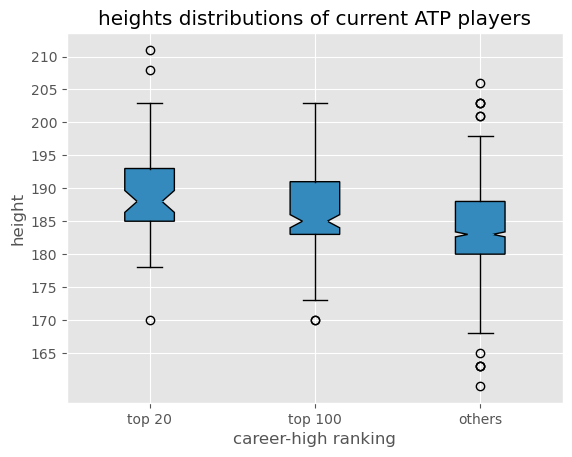

In [21]:
playerDf = playerDf[playerDf['height'] > 150][playerDf['height'] < 260]
top20df = playerDf[playerDf['rank_single_ch'] <= 20]['height']
top100df = playerDf[(playerDf['rank_single_ch'] <= 100) & (playerDf['rank_single_ch'] > 20)]['height']
othersdf = playerDf[playerDf['rank_single_ch'] > 100]['height']

data = [list(top20df), list(top100df), list(othersdf)]
# Create the box plot
plt.style.use('ggplot')

plt.boxplot(data, patch_artist=True, notch=True)
# Customize the plot (optional)
plt.title('heights distributions of current ATP players')
plt.xlabel('career-high ranking')
plt.ylabel('height')
plt.xticks([1, 2, 3], ['top 20', 'top 100', 'others'])
plt.yticks(range(165, 215, 5))
plt.show()

In [18]:
print("TOP 20:")
print(top20df.describe())
print("\n\n")
print("TOP 100:")
print(top100df.describe())
print("\n\n")
print("Others:")
print(othersdf.describe())

TOP 20:
count     57.000000
mean     189.070175
std        7.269947
min      170.000000
25%      185.000000
50%      188.000000
75%      193.000000
max      211.000000
Name: height, dtype: float64



TOP 100:
count    158.000000
mean     185.607595
std        6.303205
min      170.000000
25%      183.000000
50%      185.000000
75%      191.000000
max      203.000000
Name: height, dtype: float64



Others:
count    1096.000000
mean      183.565693
std         6.643242
min       160.000000
25%       180.000000
50%       183.000000
75%       188.000000
max       206.000000
Name: height, dtype: float64


## 2. lefty vs. righty

In [22]:
lefty = playerDf[playerDf['hand'] == 2.0]
righty = playerDf[playerDf['hand'] == 1.0]
numLeft = len(lefty)
numRight = len(righty)
print('righty players: %d, %0.1f %%'%(numRight, 100 * numRight / (numRight + numLeft)))
print('lefty players:  %d, %0.1f %%'%(numLeft, 100 * numLeft/(numLeft + numRight) )) 

righty players: 1133, 86.5 %
lefty players:  177, 13.5 %


In [23]:
matches = os.path.join(PROCESSED_DIR, "processedMatches.csv")
matches_df = pd.read_csv(matches, sep=',')
matches_df = matches_df[matches_df['pid'].notna() & matches_df['o_id'].notna() & matches_df['start'].notna()]
# remove duplicates
matches_df['sorted_pairs'] = matches_df.apply(lambda row: tuple(sorted([row['pid'], row['o_id'], row['start']])), axis=1)
print("before removing duplicates", len(matches_df))
# Remove duplicate rows based on the 'sorted_pairs' column
matches_df = matches_df.drop_duplicates(subset='sorted_pairs').drop(columns='sorted_pairs')
print("after removing duplicates", len(matches_df))

before removing duplicates 203031
after removing duplicates 157791


In [25]:
# righty win percentage, winOverRighty, winOverLefty
s_matches_df = matches_df
leftyID = list(lefty['pid'])
rightyID = list(righty['pid'])
landr = s_matches_df[(s_matches_df['pid'].isin(leftyID)) & (s_matches_df['o_id'].isin(rightyID))]
randl = s_matches_df[(s_matches_df['pid'].isin(rightyID)) & (s_matches_df['o_id'].isin(leftyID))]
# righty vs. lefty
rldf = pd.concat([landr, randl])
# righty vs. righty
rrdf = s_matches_df[(s_matches_df['pid'].isin(rightyID)) & (s_matches_df['o_id'].isin(rightyID))]
#print(len(randldf), len(randrdf))
LR_MIN = 10
winOverRighty = []
winOverLefty = []
filteredID = []
allLeftyMatches = []
for rid in rightyID:
    allLR = len(rldf[rldf['pid'] == rid]) + len(rldf[rldf['o_id'] == rid])
    if allLR >= LR_MIN:
        winLR = len(rldf[rldf['pid'] == rid][rldf['wl'] == 'W']) + len(rldf[rldf['o_id'] == rid][rldf['wl'] == 'L'])
        winOverLefty.append(winLR/ allLR)
        allRR = len(rrdf[rrdf['pid'] == rid]) + len(rrdf[rrdf['o_id'] == rid])
        winRR = len(rrdf[rrdf['pid'] == rid][rrdf['wl'] == 'W']) + len(rrdf[rrdf['o_id'] == rid][rrdf['wl'] == 'L'])
        winOverRighty.append(winRR / allRR)
        filteredID.append(rid)
        allLeftyMatches.append(allLR)

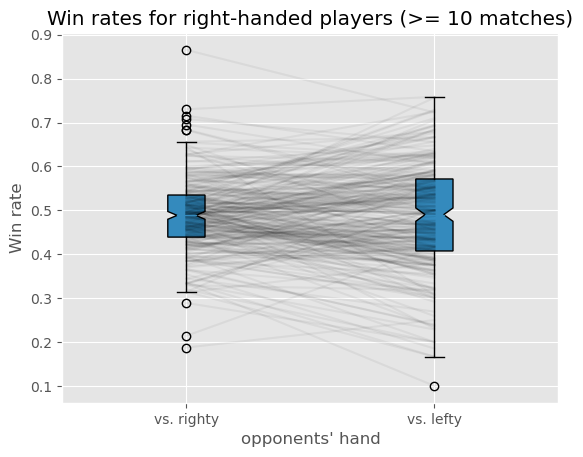

In [7]:
# Combine the lists into a single list of lists
data = [winOverRighty, winOverLefty]

# Create the box plot
bp = plt.boxplot(data, notch=True, patch_artist=True)  # Use notch=True to create notched box plots, indicating the paired nature of the data

# Draw lines between paired points
for i, (a, b) in enumerate(zip(winOverRighty, winOverLefty)):
    plt.plot([1, 2], [a, b], color='black', alpha=0.05)

# Customize the plot (optional)
plt.title('Win rates for right-handed players (>= 10 matches)')
plt.xlabel('opponents\' hand')
plt.ylabel('Win rate')
plt.xticks([1, 2], ['vs. righty', 'vs. lefty'])

# Display the plot
plt.show()



In [28]:
import altair as alt

first_name = []
last_name = []
ch_rk = []
top10 = []

for fid in filteredID:
    nowPlayer = playerDf[playerDf['pid'] == fid]
    ch_rk.append(nowPlayer['rank_single_ch'].iloc[0])
    first_name.append(nowPlayer['first_name'].iloc[0])
    last_name.append(nowPlayer['last_name'].iloc[0])
    top10.append(nowPlayer['rank_single_ch'].iloc[0] <= 10)
    
wrDf = pd.DataFrame(data={'first_name': first_name, 'last_name': last_name, 
                          'rank_single_ch': ch_rk, 'vs_righty': [round(item, 3) for item in winOverRighty], 
                          'vs_lefty': [round(item, 3) for item in winOverLefty], 'top10': top10, 
                          'num_lefty_matches': allLeftyMatches})

bar = len(wrDf[wrDf['vs_righty'] > wrDf['vs_lefty']])

print('%d of %d (%0.1f%%) players have lower win rate against lefties'%(bar, len(wrDf), 100 * bar/len(wrDf)))

190 of 355 (53.5%) players have lower win rate against lefties


In [29]:
line = pd.DataFrame({
    'vs_lefty': [0, 1],
    'vs_righty': [0, 1],
})

line_plot = alt.Chart(line).mark_line(color= 'red').encode(
    x= 'vs_lefty',
    y= 'vs_righty')

alt.Chart(wrDf, title="win rate vs. righty and lefty").mark_circle(size=60).encode(
        alt.X('vs_lefty',
        scale=alt.Scale(zero=True)
        ),
        alt.Y('vs_righty',
        scale=alt.Scale(zero=True)
        ),
        color='top10',
        tooltip=['first_name', 'last_name', 'rank_single_ch', 'vs_righty', 'vs_lefty', 'num_lefty_matches']
).interactive() + line_plot

alt.LayerChart(...)

## 3. three sets

In [40]:
# first 80 matches are 3 sets
allIds = list(playerDf['pid'])
allMatches = []
cutOff = 80
threeSets = []
jerryID = 'S0RE'
jerry3sets = 0
validPids = []
for pid in allIds:
    curFirst = pd.concat([matches_df[matches_df['pid'] == pid], matches_df[matches_df['o_id'] == pid]]).sort_values(by=['start'])[:cutOff]
    curFirst = curFirst[curFirst['games'].notna()]
    if len(curFirst) > 10:
        curFirst['3sets'] = curFirst.apply(lambda row: row['games'].count('-') == 3, axis=1)
        validPids.append(pid)
        allMatches.append(curFirst)
        threeSets.append(len(curFirst[curFirst['3sets'] == True])/len(curFirst))
        if pid == jerryID:
            jerry3sets = threeSets[-1]

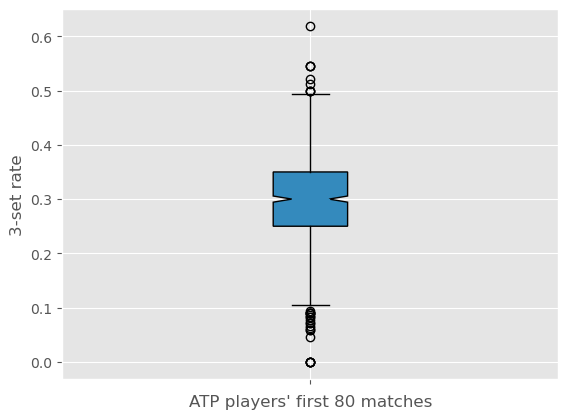

Juncheng Shang:  0.4125 percentile:  91.48
count    769.000000
mean       0.297386
std        0.085938
min        0.000000
25%        0.250000
50%        0.300000
75%        0.350000
max        0.619048
Name: 3sets, dtype: float64


In [41]:
from scipy.stats import percentileofscore
data = [threeSets]
# Create the box plot
bp = plt.boxplot(data, notch=True, patch_artist=True)  # Use notch=True to create notched box plots, indicating the paired nature of the data

# Customize the plot (optional)
plt.title('')
plt.xlabel('ATP players\' first 80 matches')
plt.ylabel('3-set rate')
plt.xticks([1], [''])

# Display the plot
plt.show()

threedf = pd.DataFrame(data={'3sets': threeSets})
percentile = percentileofscore(threeSets, jerry3sets)
print("Juncheng Shang: ", jerry3sets, "percentile: ", round(percentile, 2))
print(threedf['3sets'].describe())

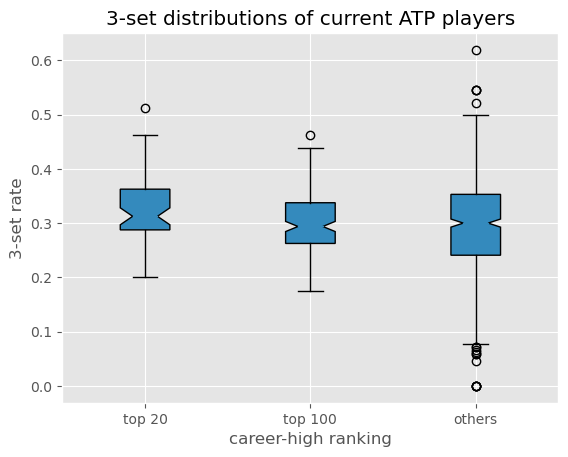

In [46]:
newDf = playerDf[playerDf['pid'].isin(validPids)]
newDf['3sets'] = threeSets

top20df_3 = newDf[newDf['rank_single_ch'] <= 20]['3sets']
top100df_3 = newDf[(newDf['rank_single_ch'] <= 100) & (newDf['rank_single_ch'] > 20)]['3sets']
othersdf_3 = newDf[newDf['rank_single_ch'] > 100]['3sets']

data = [list(top20df_3), list(top100df_3), list(othersdf_3)]
# Create the box plot
plt.style.use('ggplot')

plt.boxplot(data, patch_artist=True, notch=True)
# Customize the plot (optional)
plt.title('3-set distributions of current ATP players')
plt.xlabel('career-high ranking')
plt.ylabel('3-set rate')
plt.xticks([1, 2, 3], ['top 20', 'top 100', 'others'])
#plt.yticks(range(165, 215, 5))
plt.show()

In [47]:
newDf['top20'] = newDf.apply(lambda row: row['rank_single_ch'] <= 20, axis=1)
alt.Chart(newDf, title="3sets and career-high ranking").mark_circle(size=60).encode(
        alt.X('3sets',
        scale=alt.Scale(zero=True)
        ),
        alt.Y('rank_single_ch',
        scale=alt.Scale(zero=True)
        ),
        color='top20',
        tooltip=['first_name', 'last_name', 'rank_single_ch', '3sets']
).interactive()

alt.Chart(...)